In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
df = pd.read_csv('diabetes.csv')
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
492,4,99,68,38,0,32.8,0.145,33,0
525,3,87,60,18,0,21.8,0.444,21,0
265,5,96,74,18,67,33.6,0.997,43,0
633,1,128,82,17,183,27.5,0.115,22,0
225,1,87,78,27,32,34.6,0.101,22,0
37,9,102,76,37,0,32.9,0.665,46,1
247,0,165,90,33,680,52.3,0.427,23,0
651,1,117,60,23,106,33.8,0.466,27,0
589,0,73,0,0,0,21.1,0.342,25,0
306,10,161,68,23,132,25.5,0.326,47,1


In [11]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [19]:
# Решающее дерево
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Метрики

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [46]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]
print(f'''Метрики логистической регрессии:
    Accuracy: {accuracy_score(y_test, y_pred): .3f}, 
    Precision: {precision_score(y_test, y_pred): .3f},
    Recall: {recall_score(y_test, y_pred): .3f},
    F1-score: {f1_score(y_test, y_pred): .3f},
    ROC-AUC: {roc_auc_score(y_test, y_prob): .3f}
      ''')

Метрики логистической регрессии:
    Accuracy:  0.747, 
    Precision:  0.638,
    Recall:  0.673,
    F1-score:  0.655,
    ROC-AUC:  0.813
      


In [52]:
y_pred = tree.predict(X_test)
y_prob = tree.predict_proba(X_test)[:, 1]
print(f'''Метрики решающего дерева:
    Accuracy: {accuracy_score(y_test, y_pred): .3f}, 
    Precision: {precision_score(y_test, y_pred): .3f},
    Recall: {recall_score(y_test, y_pred): .3f},
    F1-score: {f1_score(y_test, y_pred): .3f},
    ROC-AUC: {roc_auc_score(y_test, y_prob): .3f}
      ''')

Метрики решающего дерева:
    Accuracy:  0.747, 
    Precision:  0.625,
    Recall:  0.727,
    F1-score:  0.672,
    ROC-AUC:  0.742
      


Логистическая регрессия — меньше выдает ложных диагнозов

Решающее дерево — лучше находит диабет, но с большим числом ошибок

Recall — доля реальных больных, которых модель правильно идентифицировала

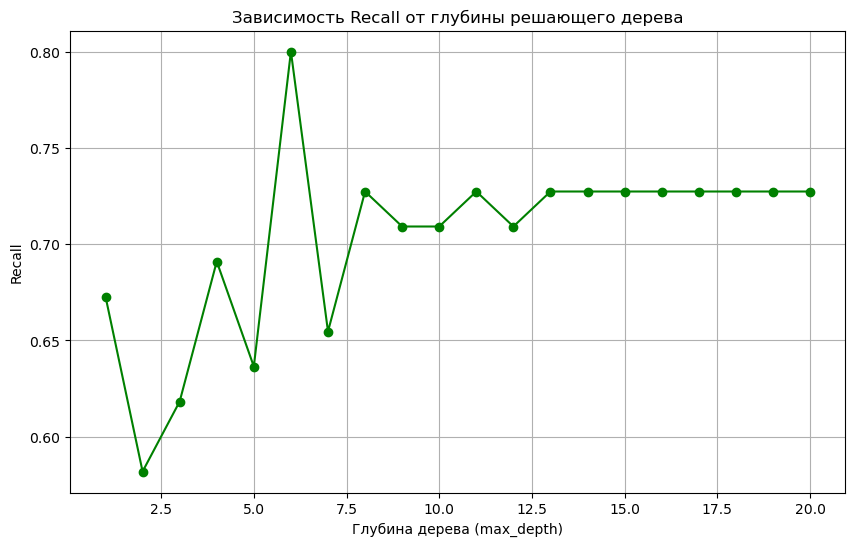

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

depths = list(range(1, 21))
recall_scores = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

plt.figure(figsize=(10, 6))
plt.plot(depths, recall_scores, marker='o', linestyle='-', color='g')
plt.title('Зависимость Recall от глубины решающего дерева')
plt.xlabel('Глубина дерева (max_depth)')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

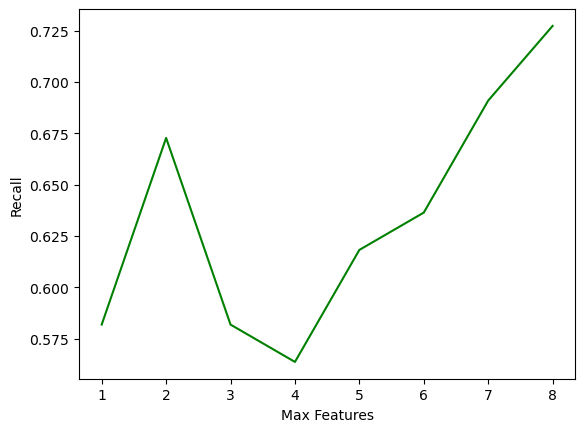

In [65]:
features = range(1, X_train.shape[1] + 1)
scores = []

for feature in features:
    dtree = DecisionTreeClassifier(max_features=feature)
    dtree.fit(X_train, y_train)
    dtree_pred = dtree.predict(X_test)
    score = recall_score(y_test, dtree_pred)
    scores.append(score)

plt.plot(features, scores, color='g')
plt.xlabel('Max Features')
plt.ylabel('Recall')
plt.show()

In [107]:
from sklearn.tree import DecisionTreeClassifier

# Создаем модель с оптимальной глубиной
optimal_tree = DecisionTreeClassifier(
    max_depth=6,            
    random_state=42         
)
optimal_tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=6, random_state=42)

In [133]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(90, 12))
plot_tree(
    optimal_tree,
    feature_names=X.columns,
    class_names=['No Diabetes', 'Diabetes'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Diabetes")
plt.savefig('diabetes_tree.png', dpi=62, bbox_inches='tight')
plt.close() 

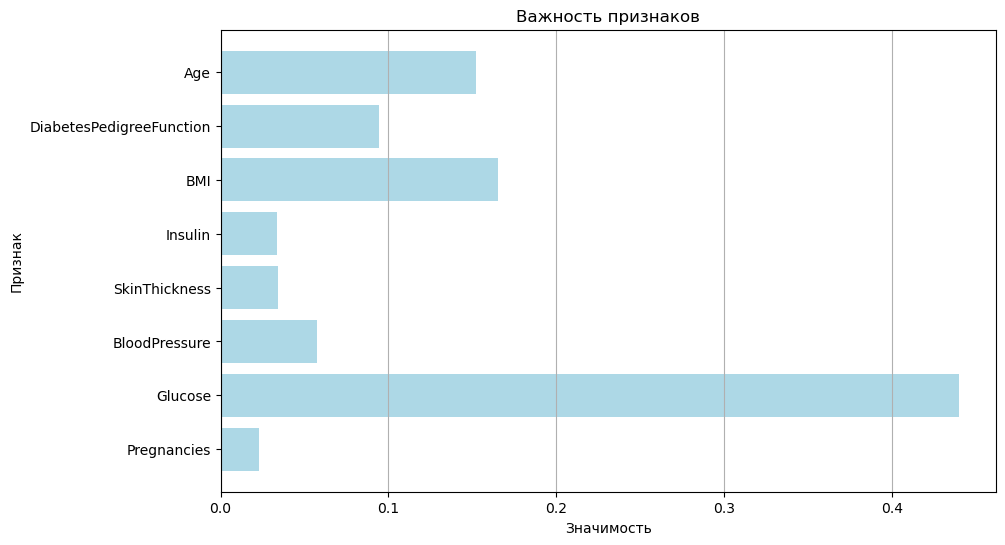

In [135]:
importances = optimal_tree.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='lightblue')
plt.title('Важность признаков')
plt.xlabel('Значимость')
plt.ylabel('Признак')
plt.grid(axis='x')
plt.show()

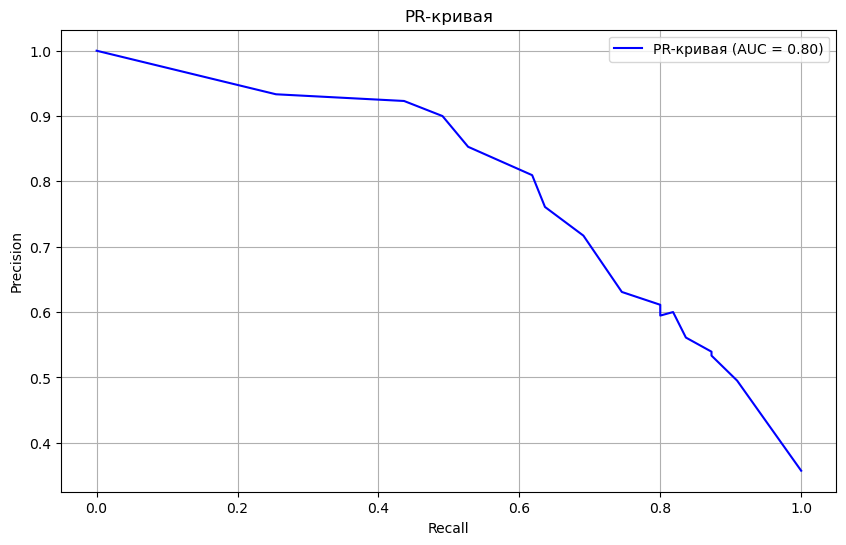

In [145]:
from sklearn.metrics import precision_recall_curve, auc

y_proba = optimal_tree.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'PR-кривая (AUC = {pr_auc:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая')
plt.legend()
plt.grid()
plt.show()

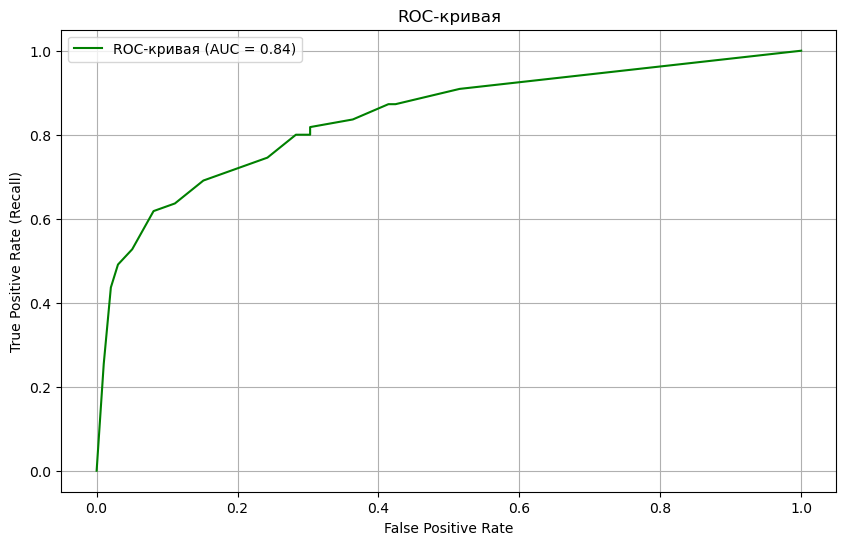

In [143]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.2f})', color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC-кривая')
plt.legend()
plt.grid()
plt.show()